<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus II: Partial Derivatives & Integrals

This class, *Calculus II: Partial Derivatives & Integrals*, builds on single-variable derivative calculus to introduce gradients and integral calculus. Gradients of learning, which are facilitated by partial-derivative calculus, are the basis of training most machine learning algorithms with data -- i.e., stochastic gradient descent (SGD). Paired with the principle of the chain rule (also covered in this class), SGD enables the backpropagation algorithm to train deep neural networks. 

Integral calculus, meanwhile, comes in handy for myriad tasks associated with machine learning, such as finding the area under the so-called “ROC curve” -- a prevailing metric for evaluating classification models. The content covered in this class is itself foundational for several other classes in the *Machine Learning Foundations* series, especially *Probability & Information Theory* and *Optimization*.

Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning. 
* Be able to grasp the details of the partial-derivative, multivariate calculus that is common in machine learning papers as well as many in other subjects that underlie ML, including information theory and optimization algorithms. 
* Use integral calculus to determine the area under any given curve, a recurring task in ML applied, for example, to evaluate model performance by calculating the ROC AUC metric.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Review of Introductory Calculus*
* Differentiation with Rules
* Cost (or Loss) Functions
* Calculating the Derivative of a Cost Function
* AutoDiff: Automatic Differentiation

*Segment 2: Gradients Applied to Machine Learning*
* Partial Derivatives of Multivariate Functions
* Gradients
* Stochastic Gradient Descent 
* The Chain Rule
* Backpropagation 

*Segment 3: Integrals*
* The Confusion Matrix
* The Receiver-Operating Characteristic (ROC) Curve 
* Calculating Integrals
* Finding the Area Under the ROC Curve
* Resources for Further Study of Calculus


## Segment 1: Review of Introductory Calculus

Refer to slides and [*Regression in PyTorch* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/regression-in-pytorch.ipynb).

## Segment 2: Gradients Applied to Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

### Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$: 

In [2]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

Plot $z$ with respect to $x$ by varying $x$... 

In [3]:
xs = np.linspace(-3, 3, 1000)

...while holding $y$ constant (e.g., at $y = 0$):

In [4]:
zs_wrt_x = f(xs, 0)

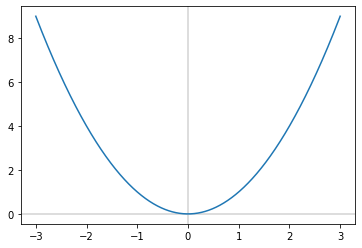

In [5]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$

In [6]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [7]:
x_samples = [-2, -1, 0, 1, 2]

In [8]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [9]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col) 
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, linestyle='dashed', linewidth=0.7)

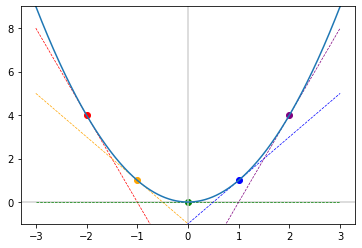

In [10]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
_ = ax.plot(xs, zs_wrt_x)

Thereby demonstrating visually that, for every unit of $x$ away from 0, the slope of $z$ along the $x$ axis doubles.

**Return to slides here.**

Now let's plot $z$ with respect to $y$ by varying $y$...

In [11]:
ys = np.linspace(-3, 3, 1000)

...while holding $x$ constant (e.g., at $x$ = 0): 

In [12]:
zs_wrt_y = f(0, ys)

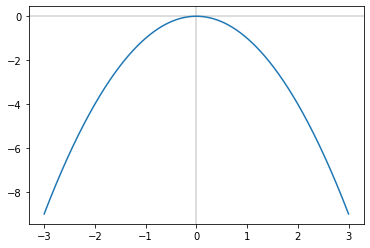

In [13]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

So for example, holding $x$ constant at 2 instead of 0 increases $z$, but has no impact whatsoever on the slope of $z$ w.r.t. $y$: 

In [14]:
zs_wrt_y = f(2, ys)

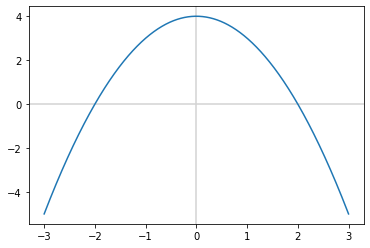

In [16]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(ys, zs_wrt_y)

In [17]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [18]:
y_samples = [-2, -1, 0, 1, 2]

In [19]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y) 
    plt.scatter(my_y, my_z, c=col) # changed my_x to my_y
    
    tangent_m = fprime(my_x, my_y) 
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys
    
    plt.plot(my_ys, tangent_line, c=col, linestyle='dashed', linewidth=0.7) # changed my_xs to my_ys

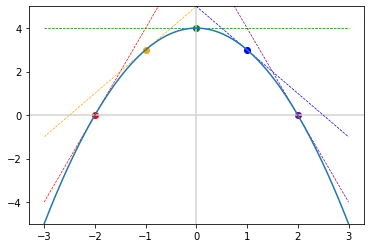

In [21]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])
plt.ylim(-5, 5)
_ = ax.plot(xs, zs_wrt_y)

Thereby demonstrating visually that, for every unit of $y$ away from 0, the slope of $z$ along the $y$ axis doubles. Because of the inverse relationship between $z$ and $y$ ($ \frac{\partial z}{\partial y} = -2y $), as $y$ increases $z$ decreases, resulting in the parabolic curve opening downward along the $y$ axis.

**Exercises**: Use pencil and paper to determine: 

* The value of $z$,
* The slope of $z$ with respect to $x$, 
* And the slope of $z$ with respect to $y$

...at the points where: 

1. $x = 3, y = 0$
2. $x = 2, y = 3$
3. $x = -2, y = -3$

Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation library to calculate the slope of $z$ with respect to both $x$ and $y$ at any given point $(x, y, z)$:

In [22]:
x = torch.tensor(0.).requires_grad_() 
x

tensor(0., requires_grad=True)

In [23]:
y = torch.tensor(0.).requires_grad_() 
y

tensor(0., requires_grad=True)

In [24]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [25]:
z.backward() # Autodiff

As we already knew from our exercises above, the slope of the point (0, 0, 0) is zero with respect to both the $x$ and $y$ axes: 

In [26]:
x.grad

tensor(0.)

In [27]:
y.grad

tensor(-0.)

**Exercise**: Repeat the most recent pencil-and-paper exercises using PyTorch (or TensorFlow, if you prefer).

**Return to slides here.**

### Partial Derivatives of a Cylinder's Volume

The volume of a cylinder is described by $v = \pi r^2 l$ where: 

* $r$ is the radius of the cylinder
* $l$ is its length

In [30]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [28]:
# Let's say the radius is 3 meters...
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [29]:
# ...and length is 5 meters:
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [31]:
# Then the volume of the cylinder is 141.4 cubic meters: 
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [32]:
v.backward()

In [33]:
l.grad

tensor(28.2743)

**Return to slides here.**

As derived on the slides: $$\frac{\partial v}{\partial l} = \pi r^2$$

In [35]:
math.pi * 3**2

28.274333882308138

This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of 28.27$\text{m}^3$. We can prove this to ourselves: 

In [36]:
cylinder_vol(3, 6)

169.64600329384882

In [37]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [38]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

For changes in $v$ with respect to $r$ we have the following from the slides: $$\frac{\partial v}{\partial r} = 2 \pi r l$$

In [39]:
r.grad

tensor(94.2478)

In [40]:
2 * math.pi * 3 * 5

94.24777960769379

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 \times 10^{-6}$:

In [41]:
delta = 1e-6

In [43]:
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta # Dividing by delta restores scale

94.24779531741478

**Return to slides here.**

### Gradients of Cost w.r.t. Model Parameters

See the standalone notebooks: 

* [Single Point Regression Gradient](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/single-point-regression-gradient.ipynb)
* [Batch Regression Gradient](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/batch-regression-gradient.ipynb)